# 연도별 치명률

In [45]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rc('font', family='Malgun Gothic')   # 맑은 고딕으로 그래프한글설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
import pandas as pd

In [6]:
#자료가져오기
df = pd.read_excel("c:/Rwork/training/02/02_역주행사고.xlsx")
df

,년도,구분,사고,사망
0,2019,전체,4223,206
1,2019,역주행,28,5
2,2020,전체,4039,223
3,2020,역주행,33,3
4,2021,전체,4883,191
5,2021,역주행,27,2


In [13]:
#데이터테이블 분리
df1 = df[df['구분']=="전체"]
df1

,년도,구분,사고,사망
0,2019,전체,4223,206
2,2020,전체,4039,223
4,2021,전체,4883,191


In [14]:
df2 = df[df['구분'] == "역주행"]
df2

,년도,구분,사고,사망
1,2019,역주행,28,5
3,2020,역주행,33,3
5,2021,역주행,27,2


In [12]:
df3 = df1.copy()
df3['구분']="일반"
df3

,년도,구분,사고,사망
0,2019,일반,4223,206
2,2020,일반,4039,223
4,2021,일반,4883,191


In [16]:
import numpy as np

In [34]:
#데이터프레임 인덱스
## 행인덱스
ltr = list(df.index)

## 열인덱스
ltc = list(df.columns)

print('ltr: ',ltr)
print('ltc: ',ltc)

ltr:  [0, 1, 2, 3, 4, 5]
ltc:  ['년도', '구분', '사고', '사망']


In [38]:
print(ltr[:2])
print(ltr[2:])

[0, 1]
[2, 3, 4, 5]


In [39]:
df3.loc[:,["사고","년도"]]

,사고,년도
0,4195,2019
2,4006,2020
4,4856,2021


In [19]:
# 데이터프레임명.loc[행 조건(행이름), 열 조건(열이름)]
df3.loc[:,'사고':'사망'] = np.array(df1.loc[:,"사고":"사망"])-np.array(df2.loc[:,"사고":"사망"])
df3

,년도,구분,사고,사망
0,2019,일반,4195,201
2,2020,일반,4006,220
4,2021,일반,4856,189


In [33]:
# 데이터프레임명.iloc[행 조건(인덱스), 열 조건(인덱스)]
df3.iloc[:,2:]

,사고,사망
0,4195,201
2,4006,220
4,4856,189


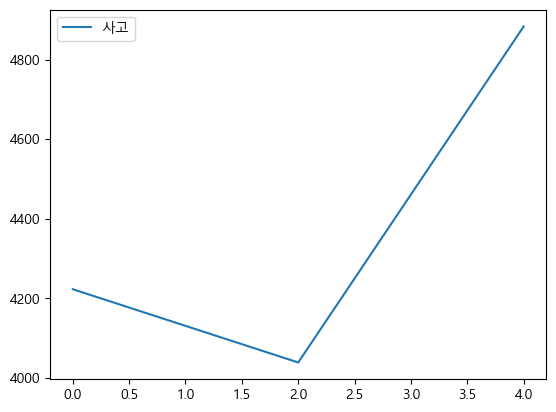

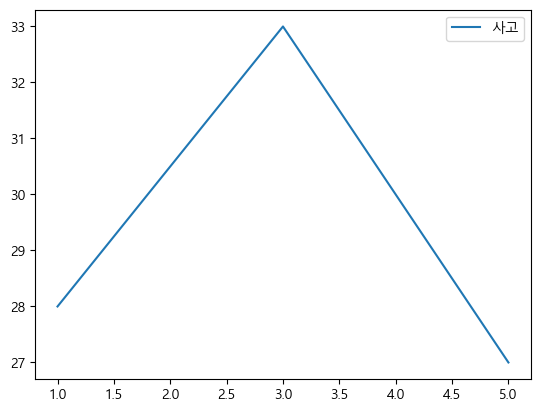

In [47]:
df1. loc[:,["사고"]].plot()
df2. loc[:,["사고"]].plot()
plt.show()

In [58]:
df2["치명률"] = round(df2["사망"] / df2["사고"] * 100,2)
df3["치명률"] = round(df3["사망"] / df3["사고"] * 100,2)

C:\Users\user\AppData\Local\Temp\ipykernel_18312\2013070093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["치명률"] = round(df2["사망"] / df2["사고"] * 100,2)


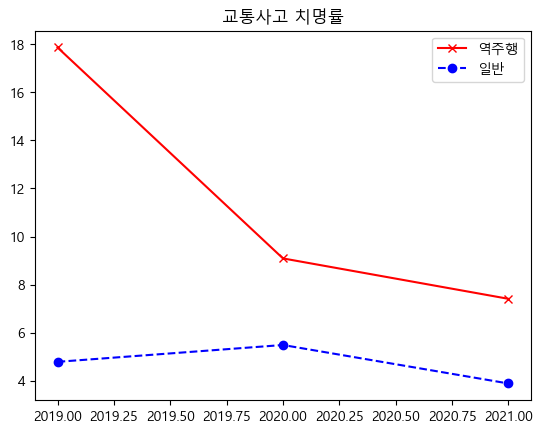

In [59]:
y2 = list(df2["치명률"])
y3 = list(df3["치명률"])
x = list(df2["년도"])

plt.plot(x,y2, 'rx-', label="역주행")
plt.plot(x,y3, 'bo--', label="일반")
plt.title("교통사고 치명률")
plt.legend()
plt.show()
